In [1]:
from visual import analyze_nc_file

nc_file = "../MOPD_pipeline/Data/Combined/combined_environment.nc"
stats, time_range = analyze_nc_file(nc_file)

Variables in the dataset:
KeysView(Frozen({'so': <xarray.Variable (time: 720, depth: 1, latitude: 240, longitude: 240)> Size: 332MB
[41472000 values with dtype=float64], 'thetao': <xarray.Variable (time: 720, depth: 1, latitude: 240, longitude: 240)> Size: 332MB
[41472000 values with dtype=float64], 'uo': <xarray.Variable (time: 720, depth: 1, latitude: 240, longitude: 240)> Size: 332MB
[41472000 values with dtype=float64], 'vo': <xarray.Variable (time: 720, depth: 1, latitude: 240, longitude: 240)> Size: 332MB
[41472000 values with dtype=float64], 'zos': <xarray.Variable (time: 720, depth: 1, latitude: 240, longitude: 240)> Size: 332MB
[41472000 values with dtype=float64], 'utide': <xarray.Variable (time: 720, depth: 1, latitude: 240, longitude: 240)> Size: 332MB
[41472000 values with dtype=float64], 'utotal': <xarray.Variable (time: 720, depth: 1, latitude: 240, longitude: 240)> Size: 332MB
[41472000 values with dtype=float64], 'vtide': <xarray.Variable (time: 720, depth: 1, latitude

## data_stat_and_visual

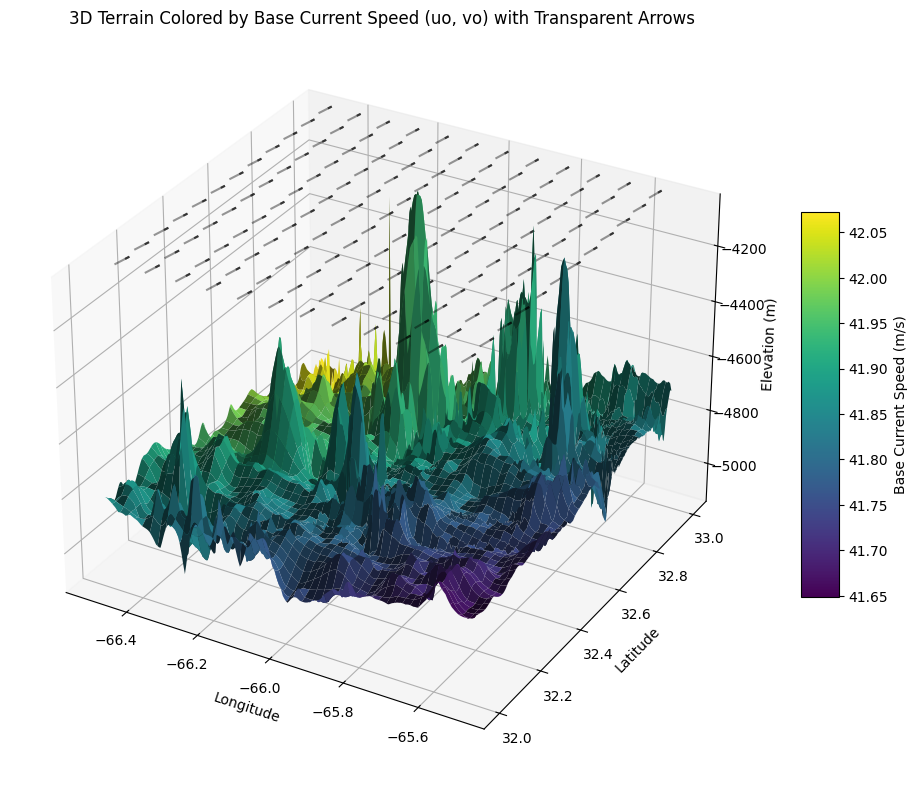

<Figure size 640x480 with 0 Axes>

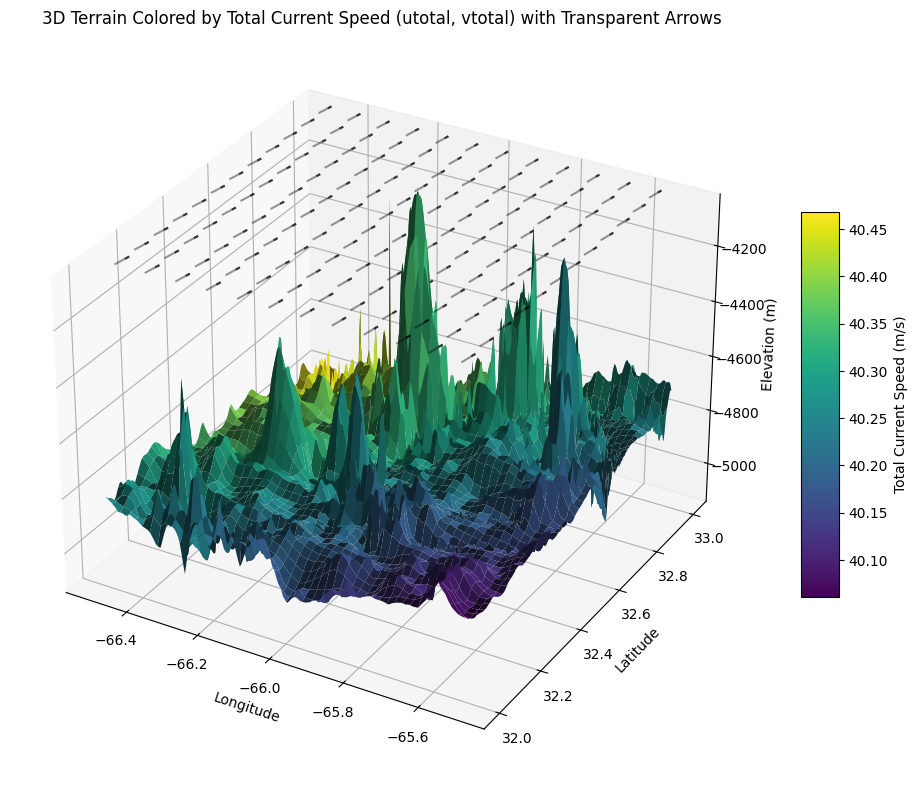

<Figure size 640x480 with 0 Axes>

In [1]:
import xarray as xr
from visual import plot_3d_currents

nc_file = "../MOPD_pipeline/Data/Combined/combined_environment.nc"
dataset = xr.open_dataset(nc_file)

plot_3d_currents(dataset, output_dir="output", skip=20, arrow_size=0.05, arrow_height_offset=5, arrow_alpha=0.4, arrow_head_size=10)

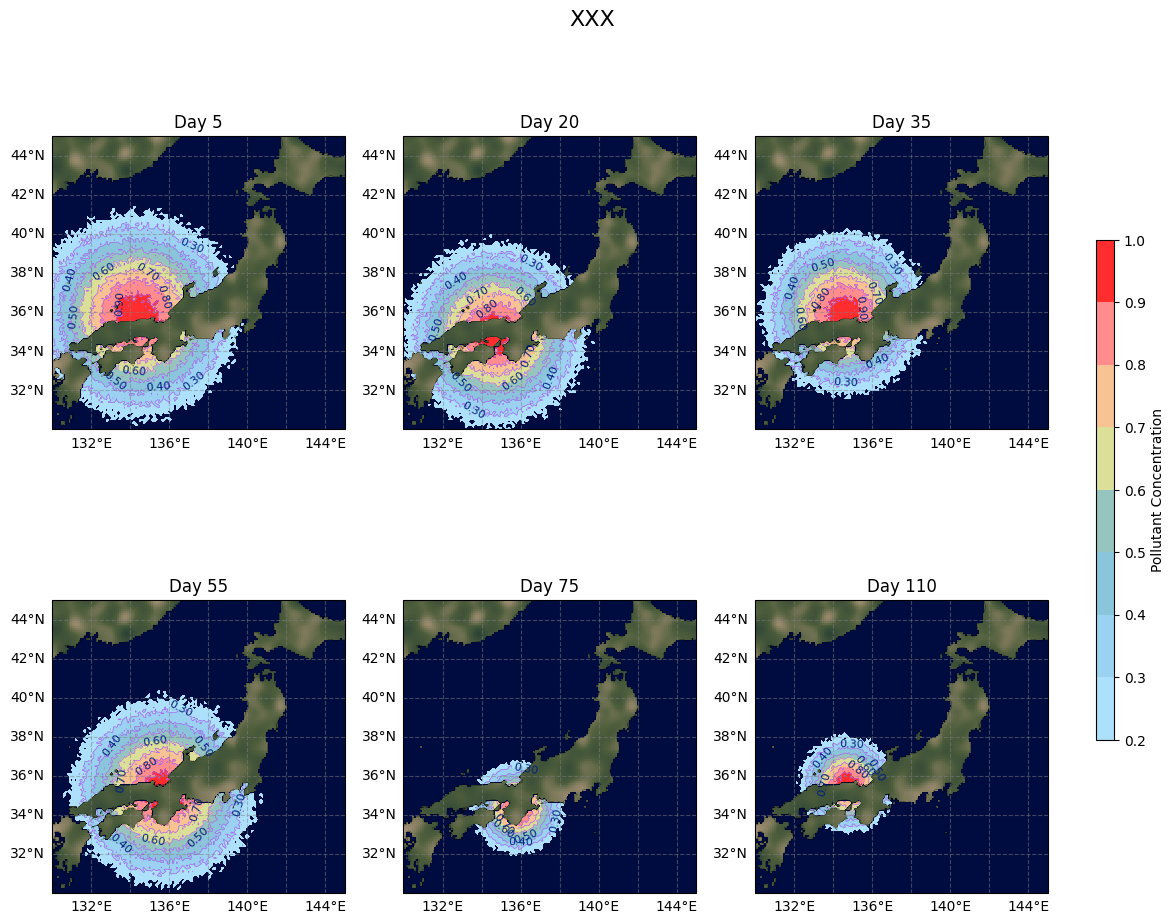

In [1]:
import numpy as np
from visual import plot_pollutant_diffusion

if __name__ == "__main__":
    lon_min, lon_max = 130, 145
    lat_min, lat_max = 30, 45
    resolution = 0.1
    lons = np.arange(lon_min, lon_max + resolution, resolution)
    lats = np.arange(lat_min, lat_max + resolution, resolution)
    lon_grid, lat_grid = np.meshgrid(lons, lats)

    days = [5, 20, 35, 55, 75, 110]
    total_days = 120
    pollutant_data = []
    pollutant_data_all_days = []

    for day in range(1, total_days + 1):
        center_lon = 135.0 + np.sin(day / 10.0)
        center_lat = 35.0 + np.cos(day / 10.0)
        scale = 1.5 + 0.5 * np.sin(day / 15.0)
        dist_lon = lon_grid - center_lon
        dist_lat = lat_grid - center_lat
        field = np.exp(-((dist_lon ** 2 + dist_lat ** 2) / (2 * scale ** 2)))
        field += 0.1 * np.random.rand(*lon_grid.shape)
        field /= field.max()
        pollutant_data_all_days.append(field)

    for d in days:
        pollutant_data.append(pollutant_data_all_days[d - 1])

    pollutant_name = "Synthetic Pollutant Diffusion"
    plot_pollutant_diffusion(lon_grid, lat_grid, pollutant_data, days, pollutant_name,
                                            pollutant_data_all_days)

In [3]:
import dask.dataframe as dd

print("Step 1: Reading CSV with selected columns and dtype handling...")
file_path = '/Users/a1234/Desktop/workspace/A Large-Scale Oceanographic Dataset for Machine Learning-Based Ocean Current and Pollution Prediction/MOPD_pipeline/Data/GMB/Global_Marine_Biodiversity_Records_All.csv'

keep_columns = [
    'eventDate', 'year', 'month', 'day', 'latitude', 'longitude', 'depth',
    'country', 'countryCode', 'locality', 'continent', 'waterBody',
    'temperature', 'salinity', 'ugo', 'vgo', 'waveVelocity', 'chlorophyll',
    'nitrate', 'phosphate', 'silicate', 'dissolvedMolecularOxygen', 'nppv',
    'dissolvedIron', 'spCO2', 'ph', 'phytoplanktonExpressedAsCarbon'
]

dtypes = {col: 'object' for col in keep_columns}
df = dd.read_csv(file_path, usecols=keep_columns, dtype=dtypes)

print("Step 2: Converting numeric columns...")
numeric_cols = [
    'latitude', 'longitude', 'depth', 'temperature', 'salinity',
    'ugo', 'vgo', 'waveVelocity', 'chlorophyll', 'nitrate', 'phosphate',
    'silicate', 'dissolvedMolecularOxygen', 'nppv', 'dissolvedIron',
    'spCO2', 'ph', 'phytoplanktonExpressedAsCarbon'
]
for col in numeric_cols:
    df[col] = dd.to_numeric(df[col], errors='coerce')

print("Step 3: Dropping duplicates...")
df = df.drop_duplicates()

print("Step 4: Saving as partitioned Parquet files...")
df.to_parquet('cleaned_marine_dataset_parts/', engine='pyarrow', write_index=False)

print("Finished: Output saved in folder 'cleaned_marine_dataset_parts/'.")

Step 1: Reading CSV with selected columns and dtype handling...
ERROR! Session/line number was not unique in database. History logging moved to new session 431
Step 2: Converting numeric columns...
Step 3: Dropping duplicates...
Step 4: Saving as partitioned Parquet files...


KeyboardInterrupt: 